In [21]:
import pandas as pd
import datetime as datetime
import pprint
import os
import psycopg2
import requests
import boto3
import dotenv
from requests import get 
from bs4 import BeautifulSoup
from urllib.parse import urlparse, parse_qs, urlunparse
from bson.json_util import dumps
from IPython.display import display, Image
from IPython.display import HTML

# An example of getting current date

currDate = datetime.datetime.now()
 
print(currDate)

2023-06-15 15:08:33.228465


In [22]:
# Load the environment variables from the .env file
dotenv.load_dotenv()

scrape_url = os.getenv('SCRAPE_URL')
# print(scrape_url)

POSTGRES_URL = os.environ.get('POSTGRES_URL')
# print(POSTGRES_URL)

FINAL_POSTGRES_URL = os.environ.get('FINAL_POSTGRES_URL')
# print(POSTGRES_URL)


In [23]:
response = requests.get(scrape_url)

# Create BeautifulSoup object
soup = BeautifulSoup(response.text, "html.parser")

body_tag = soup.body

# print(body_tag)

In [24]:
img_tags = soup.find_all("img")
img_tags

[<img src="//eproof.drudgereport.com/pixel.gif" style="visibility: collapse;"/>,
 <img src="https://pbs.twimg.com/media/FyrGbazacAguJBz?format=jpg&amp;name=small" width="495"/>,
 <img border="0" height="85" src="/i/logo9.gif" width="610"/>,
 <img src="https://pbs.twimg.com/media/Fyq1AMkaQAMoeX5?format=jpg&amp;name=360x360" width="200"/>,
 <img src="https://pbs.twimg.com/media/FyoiO8CaAAEtrXL?format=jpg&amp;name=360x360" width="200"/>,
 <img src="https://pbs.twimg.com/media/FyrASnoaYAY1blI?format=jpg&amp;name=360x360" width="200"/>,
 <img src="https://pbs.twimg.com/media/FyogeIcaAAIyBsL?format=jpg&amp;name=small" width="200"/>,
 <img src="https://pbs.twimg.com/media/FyrKf39aAAEV5lP?format=jpg&amp;name=small" width="200"/>,
 <img src="https://pbs.twimg.com/media/FyrI22UaAAAedhQ?format=jpg&amp;name=small" width="200"/>,
 <img src="https://pbs.twimg.com/media/FyoV4chaEAArTju?format=jpg&amp;name=small" width="200"/>]

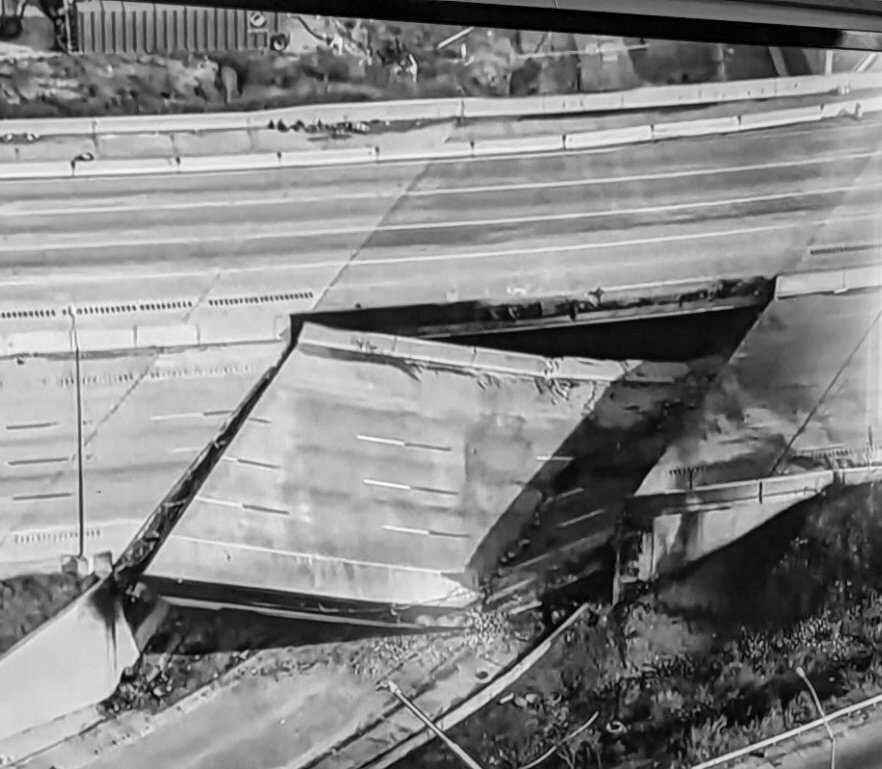

In [25]:
example_img = "https://pbs.twimg.com/media/FyV7PAEWwAADDKD.jpg"
# display(Image(example_img))
display(Image(example_img, width=200))


In [26]:
# webp file type

new_url = "https://th.bing.com/th/id/OIP.nRbbi2YXG-QUVWIcF34ElAHaLG"
# display(Image(example_img))
from IPython.display import HTML, display

new_url_with_extension = new_url
print(new_url_with_extension)

# Generate HTML code to display the image with width set to 200 pixels
html_code = f'<img src="{new_url_with_extension}" width="200">'
print(html_code)

print("display the html image BEGIN")
display(HTML(html_code))
print("display the html image END")


https://th.bing.com/th/id/OIP.nRbbi2YXG-QUVWIcF34ElAHaLG
<img src="https://th.bing.com/th/id/OIP.nRbbi2YXG-QUVWIcF34ElAHaLG" width="200">
display the html image BEGIN


display the html image END


jpg
https://pbs.twimg.com/media/FyrGbazacAguJBz
ParseResult(scheme='https', netloc='pbs.twimg.com', path='/media/FyrGbazacAguJBz', params='', query=None, fragment='')
{'format': ['jpg'], 'name': ['small']}
FyrGbazacAguJBz
https://pbs.twimg.com/media/FyrGbazacAguJBz.jpg


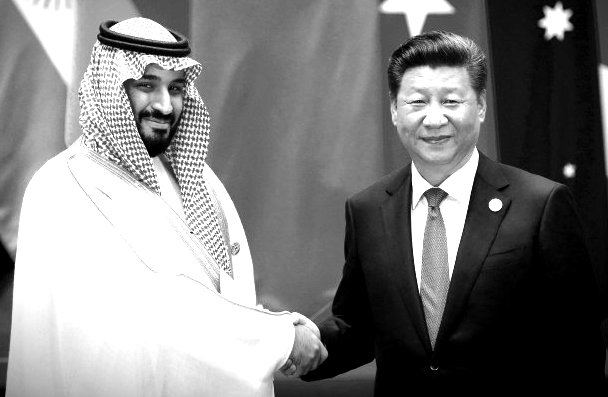

Content size of https://pbs.twimg.com/media/FyrGbazacAguJBz.jpg: 37532 bytes


jpg
https://pbs.twimg.com/media/Fyq1AMkaQAMoeX5
ParseResult(scheme='https', netloc='pbs.twimg.com', path='/media/Fyq1AMkaQAMoeX5', params='', query=None, fragment='')
{'format': ['jpg'], 'name': ['360x360']}
Fyq1AMkaQAMoeX5
https://pbs.twimg.com/media/Fyq1AMkaQAMoeX5.jpg


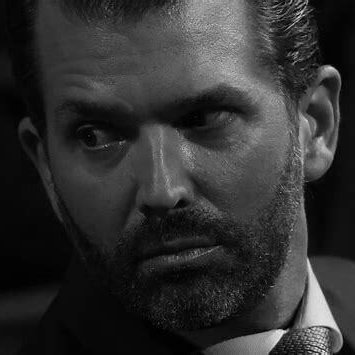

Content size of https://pbs.twimg.com/media/Fyq1AMkaQAMoeX5.jpg: 21549 bytes


jpg
https://pbs.twimg.com/media/FyoiO8CaAAEtrXL
ParseResult(scheme='https', netloc='pbs.twimg.com', path='/media/FyoiO8CaAAEtrXL', params='', query=None, fragment='')
{'format': ['jpg'], 'name': ['360x360']}
FyoiO8CaAAEtrXL
https://pbs.twimg.com/media/FyoiO8CaAAEtrXL.jpg


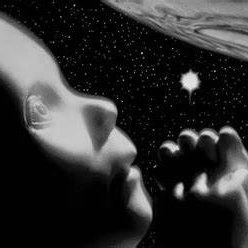

Content size of https://pbs.twimg.com/media/FyoiO8CaAAEtrXL.jpg: 11705 bytes


jpg
https://pbs.twimg.com/media/FyrASnoaYAY1blI
ParseResult(scheme='https', netloc='pbs.twimg.com', path='/media/FyrASnoaYAY1blI', params='', query=None, fragment='')
{'format': ['jpg'], 'name': ['360x360']}
FyrASnoaYAY1blI
https://pbs.twimg.com/media/FyrASnoaYAY1blI.jpg


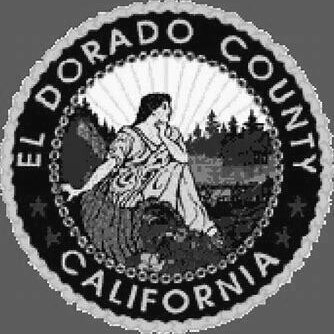

Content size of https://pbs.twimg.com/media/FyrASnoaYAY1blI.jpg: 33402 bytes


jpg
https://pbs.twimg.com/media/FyogeIcaAAIyBsL
ParseResult(scheme='https', netloc='pbs.twimg.com', path='/media/FyogeIcaAAIyBsL', params='', query=None, fragment='')
{'format': ['jpg'], 'name': ['small']}
FyogeIcaAAIyBsL
https://pbs.twimg.com/media/FyogeIcaAAIyBsL.jpg


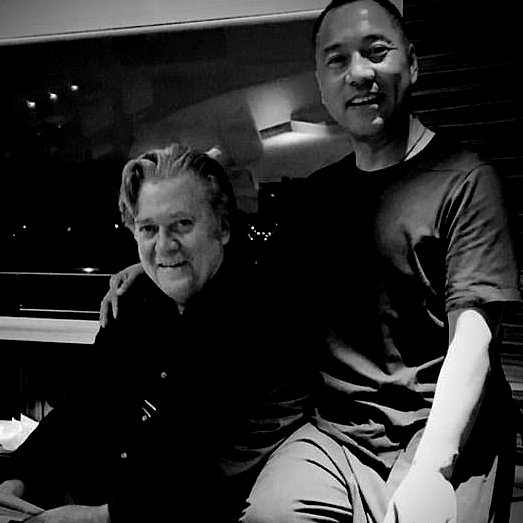

Content size of https://pbs.twimg.com/media/FyogeIcaAAIyBsL.jpg: 37486 bytes


jpg
https://pbs.twimg.com/media/FyrKf39aAAEV5lP
ParseResult(scheme='https', netloc='pbs.twimg.com', path='/media/FyrKf39aAAEV5lP', params='', query=None, fragment='')
{'format': ['jpg'], 'name': ['small']}
FyrKf39aAAEV5lP
https://pbs.twimg.com/media/FyrKf39aAAEV5lP.jpg


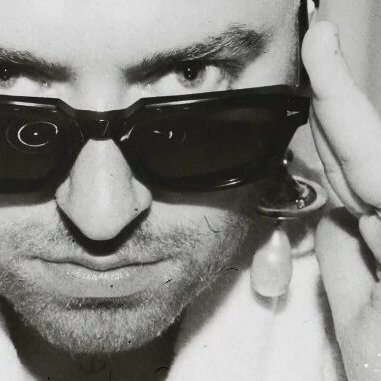

Content size of https://pbs.twimg.com/media/FyrKf39aAAEV5lP.jpg: 26819 bytes


jpg
https://pbs.twimg.com/media/FyrI22UaAAAedhQ
ParseResult(scheme='https', netloc='pbs.twimg.com', path='/media/FyrI22UaAAAedhQ', params='', query=None, fragment='')
{'format': ['jpg'], 'name': ['small']}
FyrI22UaAAAedhQ
https://pbs.twimg.com/media/FyrI22UaAAAedhQ.jpg


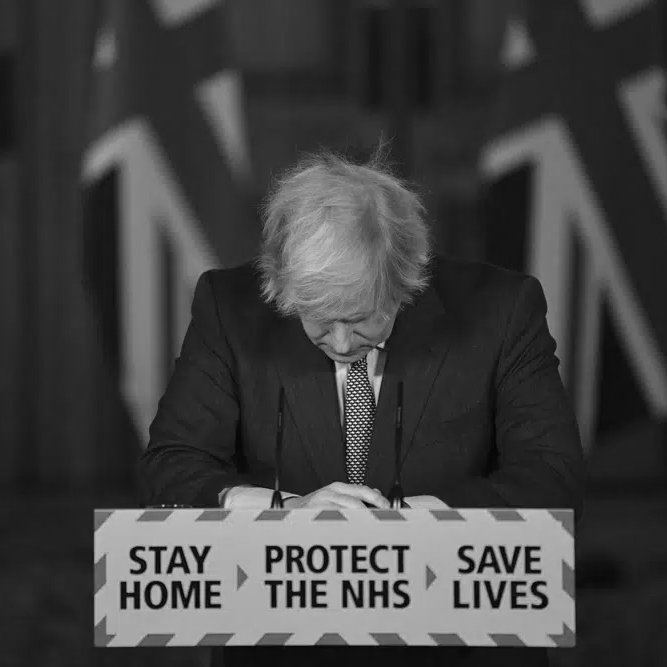

Content size of https://pbs.twimg.com/media/FyrI22UaAAAedhQ.jpg: 44061 bytes


jpg
https://pbs.twimg.com/media/FyoV4chaEAArTju
ParseResult(scheme='https', netloc='pbs.twimg.com', path='/media/FyoV4chaEAArTju', params='', query=None, fragment='')
{'format': ['jpg'], 'name': ['small']}
FyoV4chaEAArTju
https://pbs.twimg.com/media/FyoV4chaEAArTju.jpg


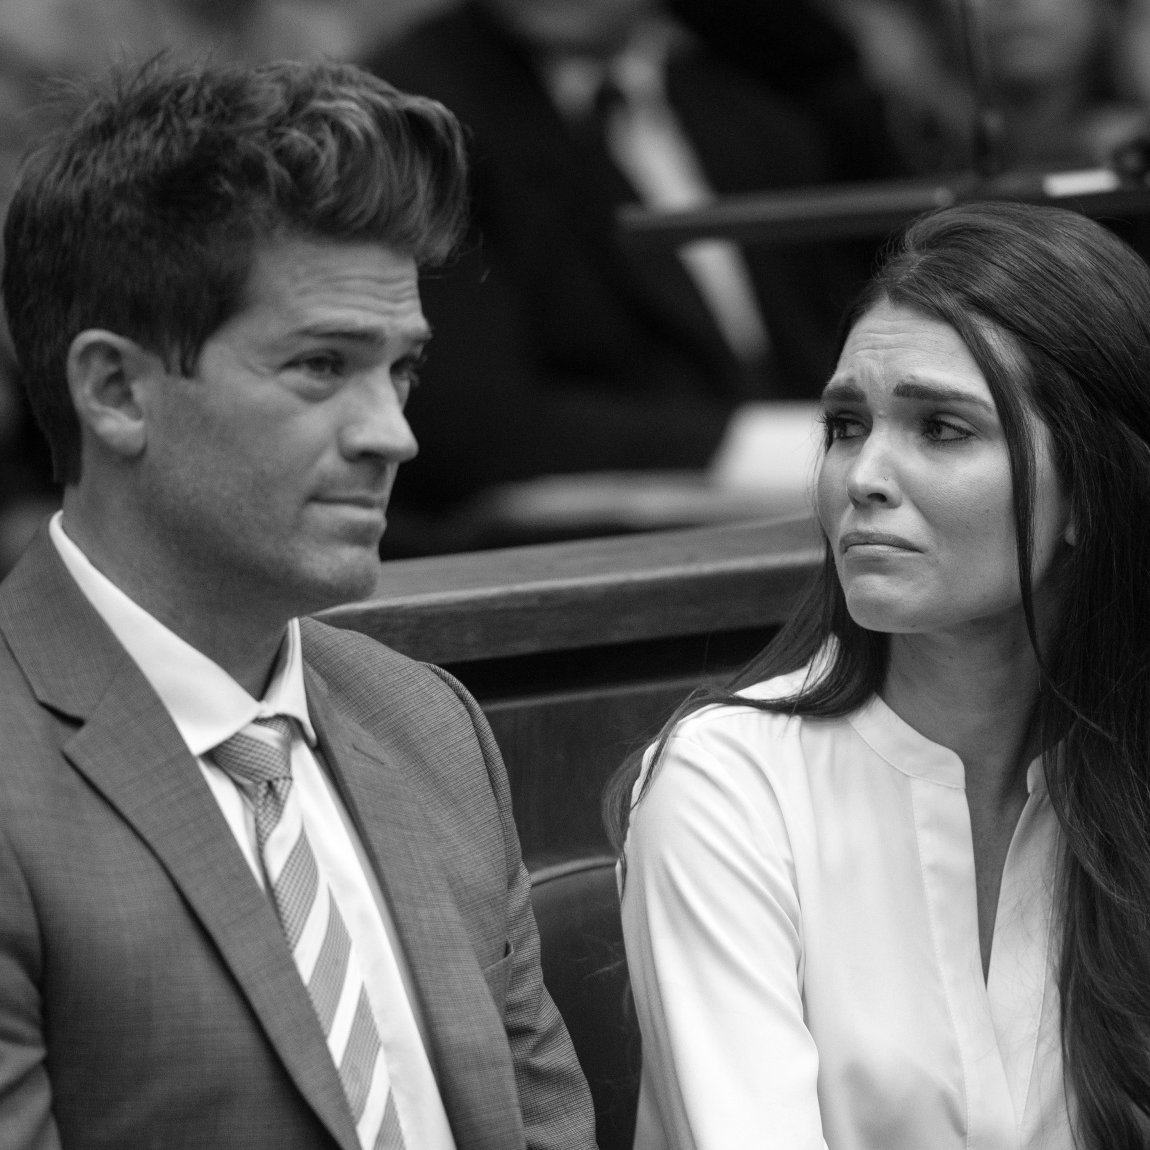

Content size of https://pbs.twimg.com/media/FyoV4chaEAArTju.jpg: 175687 bytes




In [27]:
# import os
# from urllib.parse import urlparse, parse_qs, urlunparse

for img in img_tags:
    src = img.get("src")
    if "https" in src:
        parsed_url = urlparse(src)
        query_params = parse_qs(parsed_url.query)
        extension = query_params.get('format', [''])[0]
        filename = os.path.basename(parsed_url.path)
        filename_with_extension = f"{filename}.{extension}"
        parsed_url = parsed_url._replace(query=None)
        new_url = urlunparse(parsed_url)

        print(extension)
        print(new_url)
        print(parsed_url)
        print(query_params)
        print(filename)
        # print(new_url_with_extension)

        if len(extension) > 0:
            # print("The extension is non-empty")
            new_url_with_extension = f"{new_url}.{extension}"
            print(new_url_with_extension)
            display(Image(new_url_with_extension, width=200))
            # file_size = os.path.getsize(new_url_with_extension)
            # print(file_size)
            # Send a HEAD request to retrieve the response headers
            response = requests.head(new_url_with_extension)
            # Get the content size from the response headers
            content_size = int(response.headers.get("Content-Length", 0))
            # Print the content size
            print(f"Content size of {new_url_with_extension}: {content_size} bytes")
        else:
            print("The extension is empty, omitting extension.")
            new_url_with_extension = new_url
            print(new_url_with_extension)
            # Send a HEAD request to retrieve the response headers
            response = requests.head(new_url_with_extension)
            # Get the content size from the response headers
            content_size = int(response.headers.get("Content-Length", 0))
            # Print the content size
            print(f"Content size of {new_url_with_extension}: {content_size} bytes")
            # Generate HTML code to display the image
            html_code = f'<img src="{new_url_with_extension}" width="200">'
            print(html_code)
            print("display the html image BEGIN")
            display(HTML(html_code))
            print("display the html image END")
    

        # display(Image(new_url_with_extension, width=200))
        print("\n")

        # print(extension)
        # print(new_url)
        # print(parsed_url)
        # print(query_params)
        # print(filename)
        # print(filename_with_extension)
        # display(Image(new_url + filename_with_extension.split('&')[0], width=200))


In [28]:
# Find all the lines (within <a> tags) in the webpage
lines = soup.find_all("a")

# Iterate over the lines and print line number, content, and type (link or image)
for i, line in enumerate(lines, start=1):
    line_content = line.get_text()
    line_type = "Link"
    line_url = line.get("href")

    if line.find("img"):
        line_type = "Image"

    print(f"Line {i}: {line_content} [{line_type}]")
    print(f"URL: {line_url}")

Line 1: MCCARTHY:  Don't Think Trump Has Defense... [Link]
URL: https://www.mediaite.com/trump/andy-mccarthy-shoots-down-trumps-top-argument-against-indictment-i-dont-think-he-has-a-defense/
Line 2: Republicans amplify attacks on justice system... [Link]
URL: https://apnews.com/article/trump-indictment-mccarthy-greene-congress-republicans-5173846881f090098a511b0dde9100a9
Line 3: Will Walt Nauta flip? The Don keeps valet close... [Link]
URL: https://www.msn.com/en-us/news/politics/will-walt-nauta-flip-trump-keeps-valet-close-as-question-hovers-over-the-case/ar-AA1cz2PA
Line 4: Mystery of the Bag Man... [Link]
URL: https://www.msn.com/en-us/news/opinion/trump-s-bag-man/ar-AA1czS86
Line 5: Fulton County DA: Federal indictment will not impact our case... [Link]
URL: https://www.ajc.com/politics/fulton-da-trumps-federal-indictment-will-not-impact-georgia-case/3AHFIHAOQFHRXLTI3YTUS3OCRI/
Line 6: KINGDOM, CHINA UNDERMINE USA IN MIDDLE EAST [Link]
URL: https://www.jpost.com/middle-east/article

In [29]:
import requests
from bs4 import BeautifulSoup
import psycopg2
from datetime import datetime

# Make a request to the webpage
scrape_url = os.getenv('SCRAPE_URL')
# print(scrape_url)
url = scrape_url  
response = requests.get(url)

# Create BeautifulSoup object
soup = BeautifulSoup(response.text, "html.parser")

# Find all the lines (within <a> tags) in the webpage
lines = soup.find_all("a")

# Connect to the PostgreSQL database
# conn = psycopg2.connect(
#     host="your_host",
#     database="your_database",
#     user="your_user",
#     password="your_password"
# )

FINAL_POSTGRES_URL = os.environ.get('FINAL_POSTGRES_URL')
# print(POSTGRES_URL)

# Add 'sslmode=require' to the connection URL
# POSTGRES_URL += "?sslmode=require"

# print(POSTGRES_URL)

# Insert keyboard interrupt to stop the execution
# raise KeyboardInterrupt

conn = psycopg2.connect(POSTGRES_URL)

cursor = conn.cursor()

# Initialize line_num as an integer
line_num = 0

current_datetime = datetime.now()

# Iterate over the lines and insert/update each line into the database
for line in lines:
    line_content = line.get_text()
    line_type = "Link"
    line_url = line.get("href")

    # Increment line_num for each line
    line_num += 1

    if line.find("img"):
        line_type = "Image"
        line_content = line.get("src")
        print(f"Line {line_num}: Image found {line_content}")

    if bool(line_content):
        # Upsert the line into the database
        query = """
            INSERT INTO scraper_history (line_content, line_type, line_num, line_url, first_dt, latest_dt)
            VALUES (%s, %s, %s, %s, %s, %s)
            ON CONFLICT (line_content, line_url) DO UPDATE
            SET line_type = EXCLUDED.line_type,
                line_num = EXCLUDED.line_num,
                line_url = EXCLUDED.line_url,
                latest_dt = EXCLUDED.latest_dt
            WHERE scraper_history.latest_dt < EXCLUDED.latest_dt
        """
        data = (line_content, line_type, line_num, line_url, current_datetime, current_datetime)
        cursor.execute(query, data)

# Commit the changes and close the database connection
conn.commit()
cursor.close()
conn.close()


Line 8: Image found None


### Store the image in an S3 bucket

In [30]:
# import requests
# import boto3

# URL of the webp image
url = "https://th.bing.com/th/id/OIP.nRbbi2YXG-QUVWIcF34ElAHaLG"

# Send a GET request to the image URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Access the image content
    image_content = response.content

    # Store the image content in an S3 bucket
    s3 = boto3.client('s3')
    bucket_name = 'your-bucket-name'
    key = 'image.webp'  # Provide a desired key (filename) with the .webp extension
    s3.put_object(Body=image_content, Bucket=bucket_name, Key=key)

    print("Image successfully stored in S3.")

else:
    print("Failed to retrieve the image:", response.status_code)


NoCredentialsError: Unable to locate credentials